In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('qoura_train.csv')

In [3]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.shape

(404287, 6)

In [6]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [7]:
#distribution of duplicate and non dupliate data

df['is_duplicate'].value_counts() / df['is_duplicate'].count() * 100

is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64

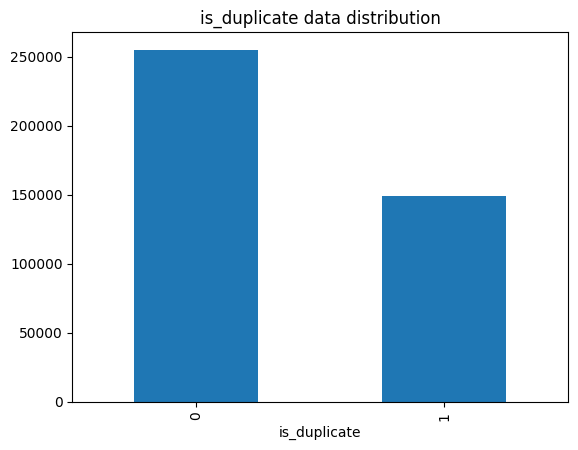

In [8]:
df['is_duplicate'].value_counts().plot(kind='bar', title='is_duplicate data distribution');

In [9]:
#Repeated questions

qids = pd.Series( df['qid1'].to_list()+df['qid2'].to_list() )

In [10]:
print('Number of unique questions: ', np.unique(qids).shape[0])

Number of unique questions:  537929


In [11]:
new_df = df.sample(30000, random_state=2)

In [12]:
qids = pd.Series( new_df['qid1'].to_list()+new_df['qid2'].to_list() )

In [13]:
len(qids)

60000

In [14]:
print('Number of unique questions: ', np.unique(qids).shape[0])

Number of unique questions:  55311


In [15]:
x = qids.value_counts() > 1

print('Number of questions getting repeated:', x[x].shape )

Number of questions getting repeated: (3485,)


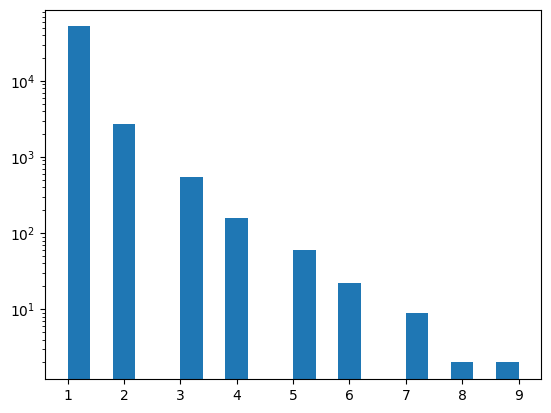

In [16]:
plt.hist(qids.value_counts().values, bins=20)
plt.yscale('log')
plt.show()

In [17]:
#Feature Engineering

#Making 2 new columns with name q1_len and q2_len which will store the length of the strings on questions

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [18]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64
...,...,...,...,...,...,...,...,...
91979,91979,154061,154062,Is it possible that SRK is bisexual or not?,Is Lady Gaga actually bisexual?,0,43,31
125045,125045,176974,56684,Why do you think people fall in love?,How do people fall in love?,1,37,27
313995,313995,438653,438654,How do I isolate a in f=(d-e) (a+(b/c))?,What is the minimized form of this logic expre...,0,40,99
203571,203571,306230,220388,What is the function of E-commerce?,Is e-commerce model sustainable?,0,35,32


In [19]:
#making 2 new column with name q1_num_words and q2_num_words which will contain the number of words of their respective questions

new_df['q1_num_words'] = new_df['question1'].apply(lambda q: len(q.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda q: len(q.split(" ")))

In [20]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [21]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [22]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8
...,...,...,...,...,...,...,...,...,...,...,...
91979,91979,154061,154062,Is it possible that SRK is bisexual or not?,Is Lady Gaga actually bisexual?,0,43,31,9,5,1
125045,125045,176974,56684,Why do you think people fall in love?,How do people fall in love?,1,37,27,8,6,5
313995,313995,438653,438654,How do I isolate a in f=(d-e) (a+(b/c))?,What is the minimized form of this logic expre...,0,40,99,8,17,0
203571,203571,306230,220388,What is the function of E-commerce?,Is e-commerce model sustainable?,0,35,32,6,4,1


In [23]:
new_df['word_total'] = new_df['q1_num_words']+new_df['q2_num_words']

In [24]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,26
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23
...,...,...,...,...,...,...,...,...,...,...,...,...
91979,91979,154061,154062,Is it possible that SRK is bisexual or not?,Is Lady Gaga actually bisexual?,0,43,31,9,5,1,14
125045,125045,176974,56684,Why do you think people fall in love?,How do people fall in love?,1,37,27,8,6,5,14
313995,313995,438653,438654,How do I isolate a in f=(d-e) (a+(b/c))?,What is the minimized form of this logic expre...,0,40,99,8,17,0,25
203571,203571,306230,220388,What is the function of E-commerce?,Is e-commerce model sustainable?,0,35,32,6,4,1,10


In [25]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [26]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,26,0.19
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91979,91979,154061,154062,Is it possible that SRK is bisexual or not?,Is Lady Gaga actually bisexual?,0,43,31,9,5,1,14,0.07
125045,125045,176974,56684,Why do you think people fall in love?,How do people fall in love?,1,37,27,8,6,5,14,0.36
313995,313995,438653,438654,How do I isolate a in f=(d-e) (a+(b/c))?,What is the minimized form of this logic expre...,0,40,99,8,17,0,25,0.00
203571,203571,306230,220388,What is the function of E-commerce?,Is e-commerce model sustainable?,0,35,32,6,4,1,10,0.10


In [29]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [31]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [32]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,...,13,0.15,0.499988,0.399992,0.000000,0.000000,0.399992,0.249997,1,0
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,...,12,0.33,0.499988,0.499988,0.999900,0.333322,0.599988,0.428565,1,0
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,...,9,0.22,0.499975,0.333322,0.999900,0.333322,0.666644,0.333328,0,1
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,...,26,0.19,0.624992,0.624992,0.000000,0.000000,0.499995,0.312498,0,0
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,...,23,0.35,0.833319,0.714276,0.749981,0.499992,0.727266,0.666661,1,0


In [35]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features